In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Data Column


##고객 특성
* customerID
* gender : 성별
* SeniorCitizen : 시니어인지(1, 0)
*  Partner : 파트너 유무(Yes, No)
*   Dependents : 부양가족 유무(Yes, No)
*   tenure : 이용 개월수
## 서비스
*   PhoneService : 음성전화(Yes, No)
*   MultipleLines : 다중회선(Yes, No, No phone service)
*   InternetService : 인터넷(DSL-디지털가입자회선, Fiber optic-광통신, No)
*   OnlineSecurity : 보안프로그램(Yes, No, No internet service)
*   OnlineBackup : 백업프로그램(Yes, No, No internet service)
*   DeviceProtection : 장치보호(Yes, No, No internet service)
*   TechSupport : 기술도움(Yes, No, No internet service)
*   StreamingTV : TV 스트리밍(Yes, No, No internet service)
*   StreamingMovies : 영화 스트리밍(Yes, No, No internet service)
## 요금 납부
*  Contract : 계약 기간(월, 1년, 2년)
*   PaperlessBilling : 온라인청구서(Yes, No)
*   PaymentMethod : 납부 방법(Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
*   MonthlyCharges : 월 납부금액
*   TotalCharges : 총 납부금액
## 이탈자
* Churn(Yes, No)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 데이터 전처리

In [ ]:
# TotalCharges 숫자형 타입 변경
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# TotalCharges 결측치 제거
df = df.dropna(subset=['TotalCharges'])

In [ ]:
# SeniorCitizen 문자형 타입 변경
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [ ]:
# 'customerID'와 'gender' 열 제거
df = df.drop(['customerID', 'gender'], axis=1)

In [ ]:
# StreamingService 생성 (StreamingTV + StreamingMovies)
df['StreamingService'] = df.apply(lambda row: 'Yes'
                                  if row['StreamingTV'] == 'Yes' or row['StreamingMovies'] == 'Yes'
                                  else 'No', axis=1)
df = pd.concat([df.iloc[:, :11], df.pop('StreamingService'), df.iloc[:, 11:]], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   object 
 1   Partner           7032 non-null   object 
 2   Dependents        7032 non-null   object 
 3   tenure            7032 non-null   int64  
 4   PhoneService      7032 non-null   object 
 5   MultipleLines     7032 non-null   object 
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingService  7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


# 나이/가족관계 별 이탈자 특성

<ipython-input-34-6a901b72f5f9>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SeniorCitizen', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-34-6a901b72f5f9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SeniorCitizen', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-34-6a901b72f5f9>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SeniorCitizen', y='TotalCharges', data=df, palette='viridis',estimator='mean', ci=None)
<ipython-input-34-6a901b72f5f9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for t

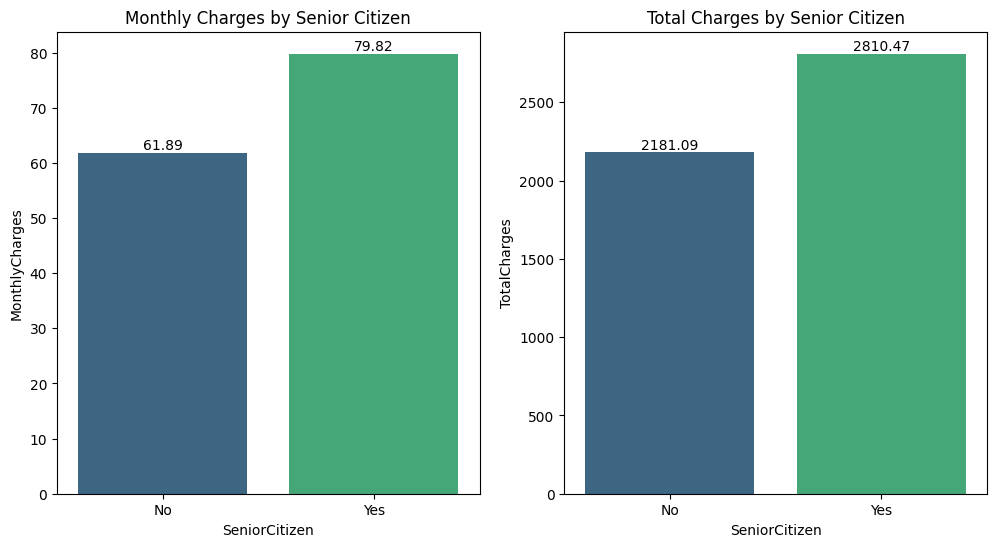

In [ ]:
# SeniorCitizen에 따라 그룹 나누기
senior_citizen_group = df[df['SeniorCitizen'] == 'Yes']
non_senior_citizen_group = df[df['SeniorCitizen'] == 'No']

# 시각화
plt.figure(figsize=(12, 6))

# 월 비용 시각화
plt.subplot(1, 2, 1)
sns.barplot(x='SeniorCitizen', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', ci=None)
plt.title('Monthly Charges by Senior Citizen')
for index, value in enumerate(df.groupby('SeniorCitizen')['MonthlyCharges'].mean()):
    plt.text(index, value, round(value, 2), ha='center', va='bottom')

# 총 이용비용 시각화
plt.subplot(1, 2, 2)
sns.barplot(x='SeniorCitizen', y='TotalCharges', data=df, palette='viridis',estimator='mean', ci=None)
plt.title('Total Charges by Senior Citizen')
for index, value in enumerate(df.groupby('SeniorCitizen')['TotalCharges'].mean()):
    plt.text(index, value, round(value, 2), ha='center', va='bottom')


plt.show()

시니어 고객이 월 평균비용과 총 평균비용이 크다. 시니어 고객은 수익을 증가하는데 중요하다. 하지만 시니어의 이탈율이 약 40%로 평균 이탈율보다 높기 때문에 시니어 고객을 유지하는 것이 필요하다.



<ipython-input-40-6776fc56b1bc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Partner', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', errorbar=None)
<ipython-input-40-6776fc56b1bc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Partner', y='TotalCharges', data=df, palette='viridis',estimator='mean', errorbar=None)


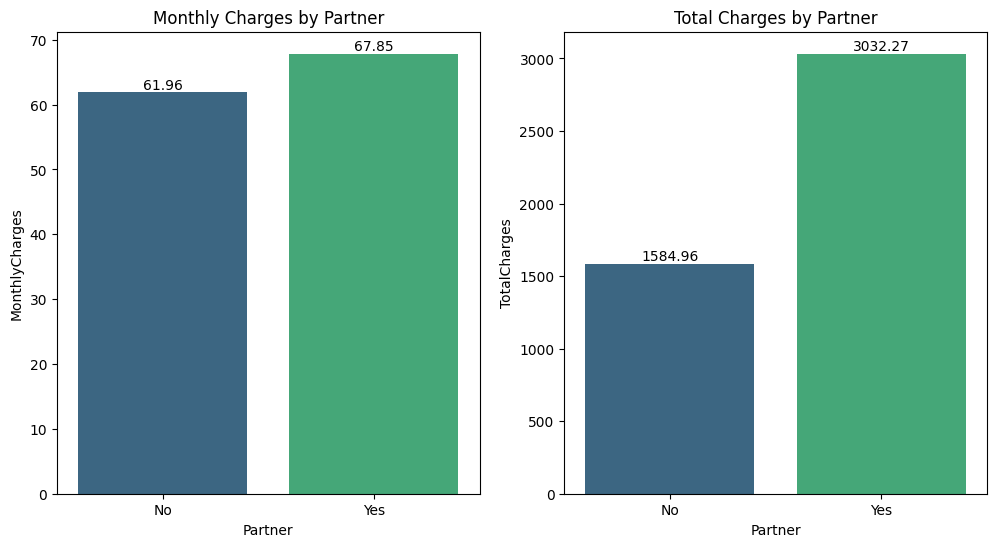

In [ ]:
# Partner에 따라 그룹 나누기
senior_citizen_group = df[df['Partner'] == 'Yes']
non_senior_citizen_group = df[df['Partner'] == 'No']
df['Partner'] = pd.Categorical(df['Partner'], categories=['No', 'Yes'], ordered=True)

# 시각화
plt.figure(figsize=(12, 6))

# 월 비용 시각화
plt.subplot(1, 2, 1)
sns.barplot(x='Partner', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', errorbar=None)
plt.title('Monthly Charges by Partner')
for index, value in enumerate(df.groupby('Partner')['MonthlyCharges'].mean()):
    plt.text(index, value, round(value, 2), ha='center', va='bottom')

# 총 이용비용 시각화
plt.subplot(1, 2, 2)
sns.barplot(x='Partner', y='TotalCharges', data=df, palette='viridis',estimator='mean', errorbar=None)
plt.title('Total Charges by Partner')
for index, value in enumerate(df.groupby('Partner')['TotalCharges'].mean()):
    plt.text(index, value, round(value, 2), ha='center', va='bottom')

plt.show()

파트너가 있는 고객은 없는 고객보다 총 비용이 크다. 파트너가 있는 고객이 충성도가 높다.

<ipython-input-41-6ac15629a2ca>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dependents', y='MonthlyCharges', data=df, palette='viridis', ci=None)
<ipython-input-41-6ac15629a2ca>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dependents', y='MonthlyCharges', data=df, palette='viridis', ci=None)
<ipython-input-41-6ac15629a2ca>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dependents', y='TotalCharges', data=df, palette='viridis', ci=None)
<ipython-input-41-6ac15629a2ca>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dependents', y='TotalCharges',

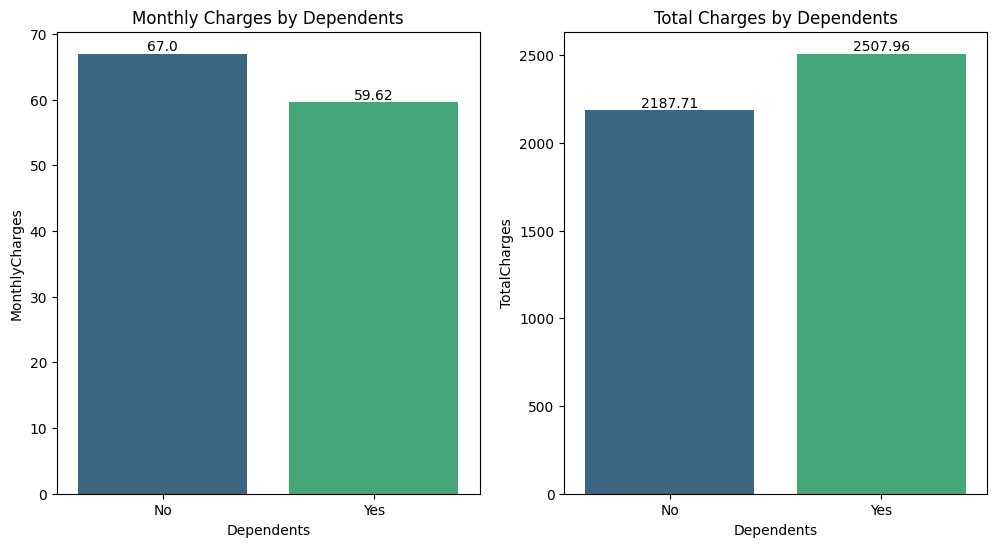

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))

# 월 평균 비용 시각화
plt.subplot(1, 2, 1)
sns.barplot(x='Dependents', y='MonthlyCharges', data=df, palette='viridis', ci=None)
plt.title('Monthly Charges by Dependents')

# 평균값 막대 끝에 나타내기
for index, value in enumerate(df.groupby('Dependents')['MonthlyCharges'].mean()):
    plt.text(index, value, round(value, 2), ha='center', va='bottom')

# 총 평균 비용 시각화
plt.subplot(1, 2, 2)
sns.barplot(x='Dependents', y='TotalCharges', data=df, palette='viridis', ci=None)
plt.title('Total Charges by Dependents')

# 평균값 막대 끝에 나타내기
for index, value in enumerate(df.groupby('Dependents')['TotalCharges'].mean()):
    plt.text(index, value, round(value, 2), ha='center', va='bottom')

plt.show()

부양가족이 있는 고객은 월 평균비용은 작은 대신 총 비용은 더 크다. 부양가족이 있는 고객의 충성도가 더 높다.

In [ ]:
# 나이에 따른 평균 이용 기간 구하기
average_tenure_by_SeniorCitizen = df.groupby('SeniorCitizen')['tenure'].mean()

# 결과 출력
print("시니어가 아닌 경우의 평균 이용 기간:", round(average_tenure_by_SeniorCitizen['No'], 2))
print("시니어인 경우의 평균 이용 기간:", round(average_tenure_by_SeniorCitizen['Yes'], 2))

시니어가 아닌 경우의 평균 이용 기간: 32.25
시니어인 경우의 평균 이용 기간: 33.3


In [ ]:
# 파트너에 따른 평균 이용 기간 구하기
average_tenure_by_Partner = df.groupby('Partner')['tenure'].mean()

# 결과 출력
print("파트너이 없는 경우의 평균 이용 기간:", round(average_tenure_by_Partner['No'], 2))
print("파트너이 있는 경우의 평균 이용 기간:", round(average_tenure_by_Partner['Yes'], 2))

파트너이 없는 경우의 평균 이용 기간: 23.37
파트너이 있는 경우의 평균 이용 기간: 42.13


In [ ]:
# 부양 가족에 따른 평균 이용 기간 구하기
average_tenure_by_dependents = df.groupby('Dependents')['tenure'].mean()

# 결과 출력
print("부양 가족이 없는 경우의 평균 이용 기간:", round(average_tenure_by_dependents['No'], 2))
print("부양 가족이 있는 경우의 평균 이용 기간:", round(average_tenure_by_dependents['Yes'], 2))

부양 가족이 없는 경우의 평균 이용 기간: 29.81
부양 가족이 있는 경우의 평균 이용 기간: 38.57


<ipython-input-89-2ae555049837>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SeniorCitizen', y='tenure', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-89-2ae555049837>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SeniorCitizen', y='tenure', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-89-2ae555049837>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Partner', y='tenure', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-89-2ae555049837>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplo

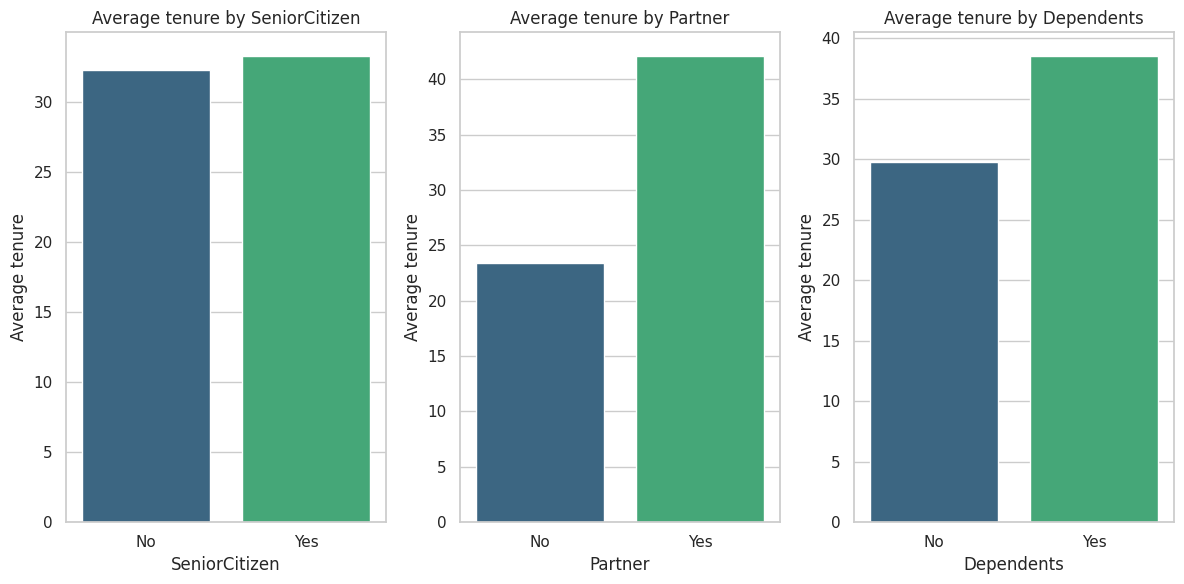

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))

# 나이에 따른 평균 이용 기간 시각화
plt.subplot(1, 3, 1)
sns.barplot(x='SeniorCitizen', y='tenure', data=df, palette='viridis', estimator='mean', ci=None)
plt.title('Average tenure by SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Average tenure')

# 파트너 여부에 따른 평균 이용 기간 시각화
plt.subplot(1, 3, 2)
sns.barplot(x='Partner', y='tenure', data=df, palette='viridis', estimator='mean', ci=None)
plt.title('Average tenure by Partner')
plt.xlabel('Partner')
plt.ylabel('Average tenure')

# 부양가족 여부에 따른 평균 이용 기간 시각화
plt.subplot(1, 3, 3)
sns.barplot(x='Dependents', y='tenure', data=df, palette='viridis', estimator='mean', ci=None)
plt.title('Average tenure by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Average tenure')

plt.tight_layout()
plt.show()

시니어인 고객은 다른 고객층과 비교하여 평균 이용 기간은 비슷하지만 비용을 많이 쓰고 이탈을 많이 한다. 시니어를 대상으로 한 마케팅이 필요하다는 점은 명확하다.

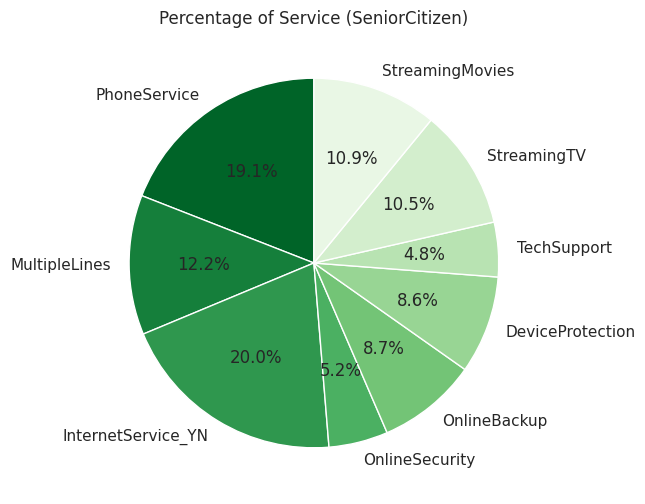

In [ ]:
# SeniorCitizen이 Yes인 경우만 필터링
filtered_df = df[df['SeniorCitizen'] == 'Yes']
# 'InternetService' 열에서 'DSL', 'Fiber optic'이면 'Yes', 그 외는 'No'로 설정
df['InternetService_YN'] = df['InternetService'].isin(['DSL', 'Fiber optic']).map({True: 'Yes', False: 'No'})

# 각 열별로 'Yes' 개수 카운트
services_counts = filtered_df.drop(columns=['SeniorCitizen']).apply(lambda x: x.value_counts().get('Yes', 0))

# 필요한 열만 선택
selected_services = ['PhoneService', 'MultipleLines', 'InternetService_YN', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
services_counts_selected = services_counts[selected_services]
# 전체 'Yes' 개수 계산
total_yes = services_counts_selected.sum()
# 퍼센트 계산
services_percent = (services_counts_selected / total_yes) * 100
# 시각화
plt.figure(figsize=(10, 6))
plt.pie(services_percent, labels=services_percent.index, autopct='%1.1f%%',
        startangle=90, colors= list(reversed(sns.color_palette('Greens', n_colors=len(services_percent)))))
plt.title('Percentage of Service (SeniorCitizen)')
plt.show()

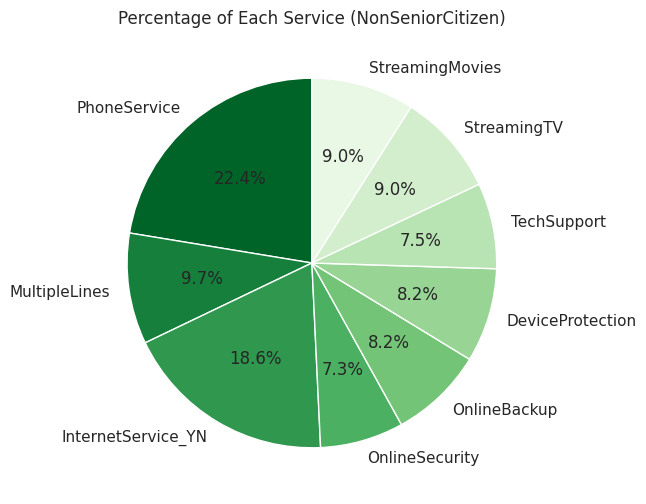

In [ ]:
# NonSeniorCitizen이 1인 경우만 필터링
filtered_df = df[df['SeniorCitizen'] == 'No']
# 'InternetService' 열에서 'DSL', 'Fiber optic'이면 'Yes', 그 외는 'No'로 설정
df['InternetService_YN'] = df['InternetService'].isin(['DSL', 'Fiber optic']).map({True: 'Yes', False: 'No'})

# 각 열별로 'Yes' 개수 카운트
services_counts = filtered_df.drop(columns=['SeniorCitizen']).apply(lambda x: x.value_counts().get('Yes', 0))

# 필요한 열만 선택
selected_services = ['PhoneService', 'MultipleLines', 'InternetService_YN', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
services_counts_selected = services_counts[selected_services]

# 전체 'Yes' 개수 계산
total_yes = services_counts_selected.sum()
# 퍼센트 계산
services_percent = (services_counts_selected / total_yes) * 100
# 시각화
plt.figure(figsize=(10, 6))
plt.pie(services_percent, labels=services_percent.index, autopct='%1.1f%%',
        startangle=90, colors= list(reversed(sns.color_palette('Greens', n_colors=len(services_percent)))))
plt.title('Percentage of Each Service (NonSeniorCitizen)')
plt.show()

시니어가 조금 더 인터넷과 스트리밍 서비스를 사용하는 비율이 높다.

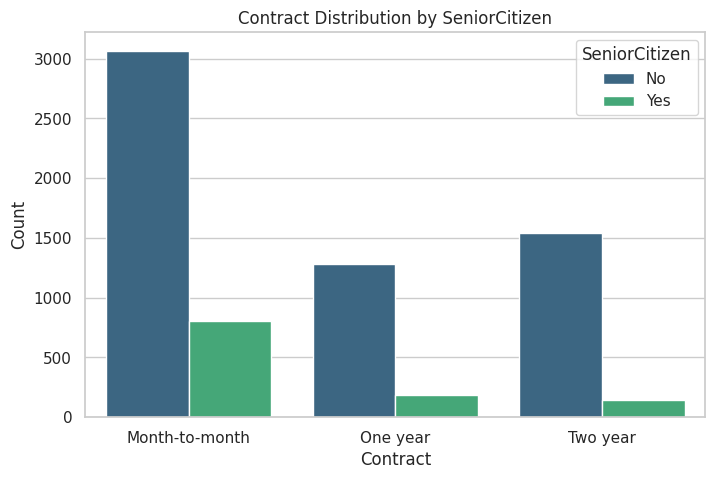

In [ ]:
# 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='SeniorCitizen', data=df, palette='viridis')
plt.title('Contract Distribution by SeniorCitizen')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

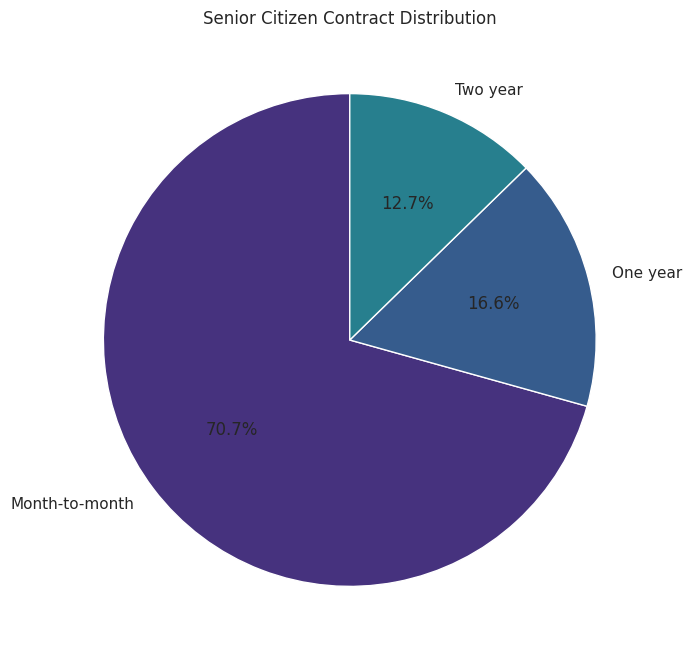

In [ ]:
# 시니어 여부에 따른 계약 기간 분포
senior_contracts = df[df['SeniorCitizen'] == 'Yes']['Contract'].value_counts()
total_contracts = df['Contract'].value_counts()

# 시각화
plt.figure(figsize=(8, 8))
plt.pie(senior_contracts, labels=senior_contracts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Senior Citizen Contract Distribution')
plt.show()

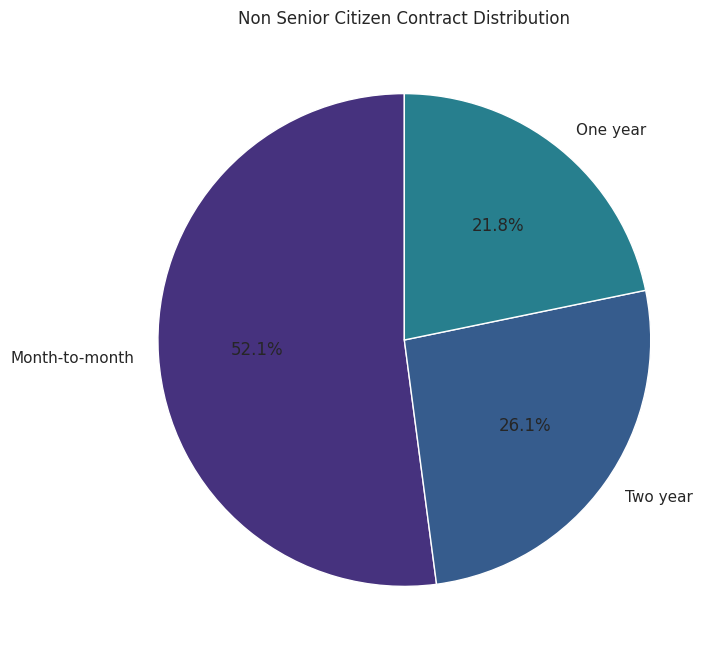

In [ ]:
# 시니어 여부에 따른 계약 기간 분포
senior_contracts = df[df['SeniorCitizen'] == 'No']['Contract'].value_counts()
total_contracts = df['Contract'].value_counts()

# 시각화
plt.figure(figsize=(8, 8))
plt.pie(senior_contracts, labels=senior_contracts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Non Senior Citizen Contract Distribution')
plt.show()

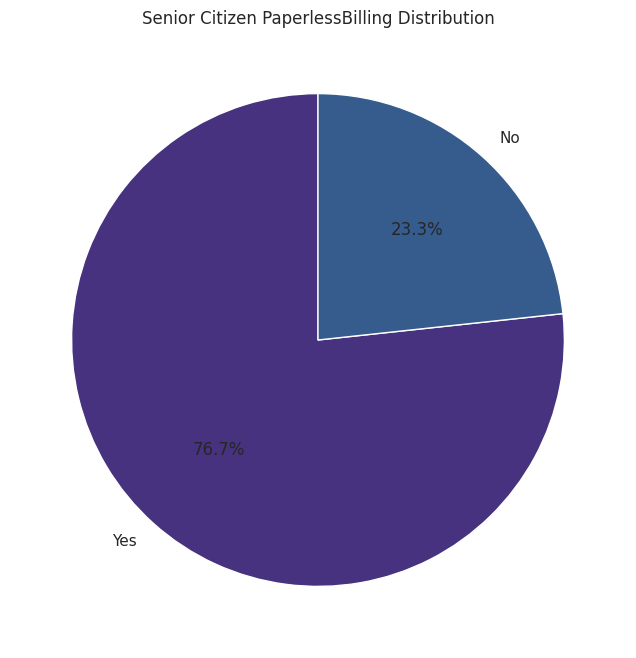

In [ ]:
# 시니어 여부에 따른 종이없는 청구서 분포
senior_PaperlessBillings = df[df['SeniorCitizen'] == 'Yes']['PaperlessBilling'].value_counts()
total_PaperlessBillings = df['PaperlessBilling'].value_counts()

# 시각화
plt.figure(figsize=(8, 8))
plt.pie(senior_PaperlessBillings, labels=senior_PaperlessBillings.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Senior Citizen PaperlessBilling Distribution')
plt.show()

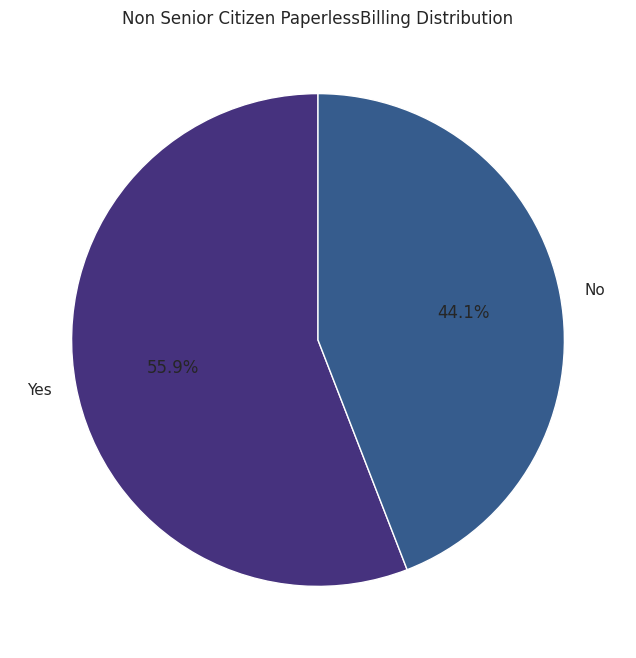

In [ ]:
# 시니어 여부에 따른 종이없는 영수증 사용 분포
senior_PaperlessBillings = df[df['SeniorCitizen'] == 'No']['PaperlessBilling'].value_counts()
total_PaperlessBillings = df['PaperlessBilling'].value_counts()

# 시각화
plt.figure(figsize=(8, 8))
plt.pie(senior_PaperlessBillings, labels=senior_PaperlessBillings.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Non Senior Citizen PaperlessBilling Distribution')
plt.show()

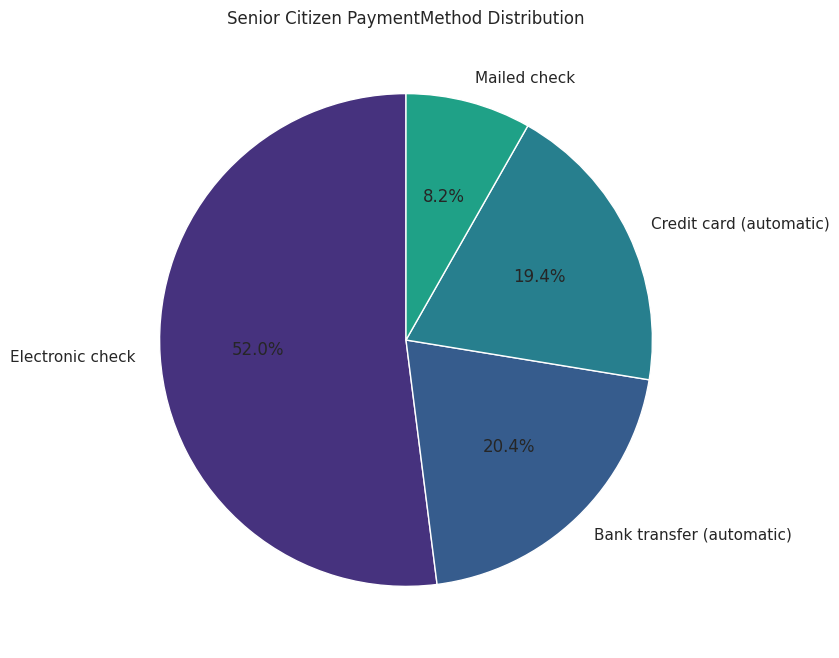

In [ ]:
# 시니어 여부에 따른 납부방법 분포
senior_PaymentMethods = df[df['SeniorCitizen'] == 'Yes']['PaymentMethod'].value_counts()
total_PaymentMethods = df['PaymentMethod'].value_counts()

# 시각화
plt.figure(figsize=(8, 8))
plt.pie(senior_PaymentMethods, labels=senior_PaymentMethods.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Senior Citizen PaymentMethod Distribution')
plt.show()

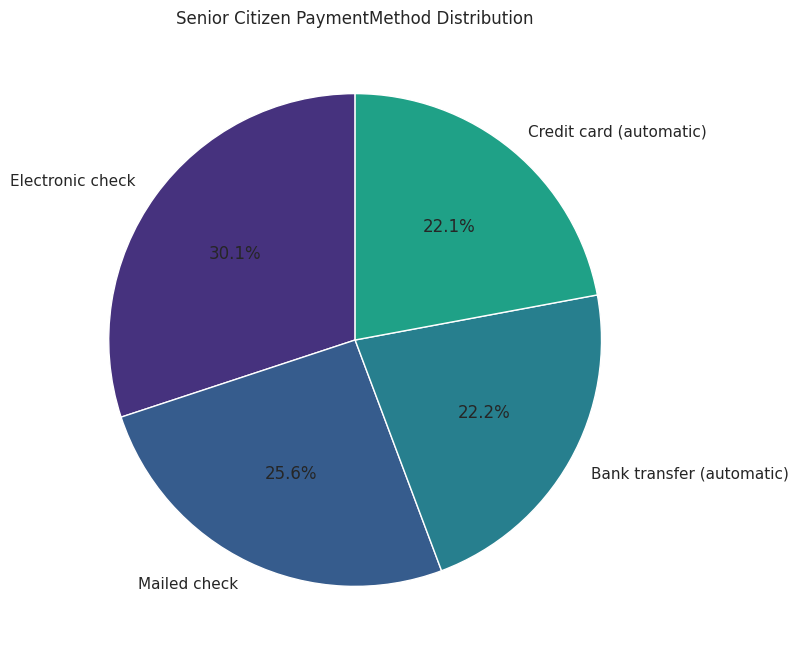

In [ ]:
# 시니어 여부에 따른 납부방법 분포
senior_PaymentMethods = df[df['SeniorCitizen'] == 'No']['PaymentMethod'].value_counts()
total_PaymentMethods = df['PaymentMethod'].value_counts()

# 시각화
plt.figure(figsize=(8, 8))
plt.pie(senior_PaymentMethods, labels=senior_PaymentMethods.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Senior Citizen PaymentMethod Distribution')
plt.show()

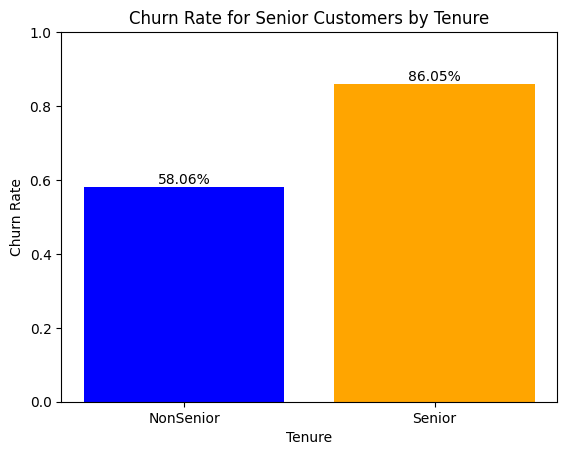

In [ ]:
# tenure가 1인 시니어 고객 필터링
senior_customers_tenure_1 = df[(df['SeniorCitizen'] == 'Yes') & (df['tenure'] == 1)]

# 이탈한 고객의 수 계산
churned_senior_customers_tenure_1 = senior_customers_tenure_1[senior_customers_tenure_1['Churn'] == 'Yes']

# 이탈률 계산
churn_rate_tenure_1_senior = len(churned_senior_customers_tenure_1) / len(senior_customers_tenure_1)

# tenure가 1인 시니어 아닌 고객 필터링
senior_customers_tenure_0 = df[(df['SeniorCitizen'] == 'No') & (df['tenure'] == 1)]

# 이탈한 고객의 수 계산
churned_senior_customers_tenure_0 = senior_customers_tenure_0[senior_customers_tenure_0['Churn'] == 'Yes']

# 이탈률 계산
churn_rate_tenure_0_senior = len(churned_senior_customers_tenure_0) / len(senior_customers_tenure_0)

churn_rates = [churn_rate_tenure_0_senior, churn_rate_tenure_1_senior]
tenure_labels = ['NonSenior', 'Senior']

# 시각화
plt.bar(tenure_labels, churn_rates, color=['blue', 'orange'])
plt.title('Churn Rate for Senior Customers by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)  # y축 범위를 0에서 1로 지정 (이탈률은 0과 1 사이의 값)

# 각 막대에 값 표시
for i, rate in enumerate(churn_rates):
    plt.text(i, rate, f'{rate:.2%}', ha='center', va='bottom')

# 서비스/납부방법/납부주기에 따른 금액


<ipython-input-13-34b7e93a0254>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PhoneService', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-13-34b7e93a0254>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PhoneService', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-13-34b7e93a0254>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PhoneService', y='TotalCharges', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-13-34b7e93a0254>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the s

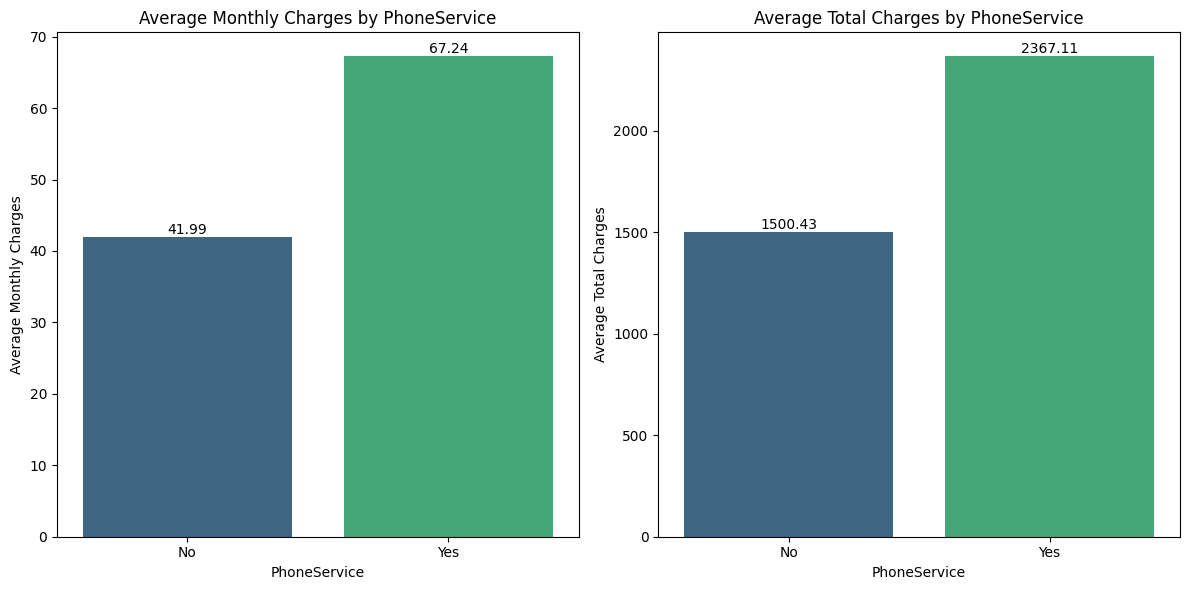

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))

# PhoneService별 평균 월 금액 시각화
plt.subplot(1, 2, 1)
sns.barplot(x='PhoneService', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', ci=None)
plt.title('Average Monthly Charges by PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Average Monthly Charges')

# 금액 표시
for index, value in enumerate(df.groupby('PhoneService')['MonthlyCharges'].mean()):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# PhoneService별 총 금액 시각화
plt.subplot(1, 2, 2)
sns.barplot(x='PhoneService', y='TotalCharges', data=df, palette='viridis', estimator='mean', ci=None)
plt.title('Average Total Charges by PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Average Total Charges')

# 금액 표시
for index, value in enumerate(df.groupby('PhoneService')['TotalCharges'].mean()):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

<ipython-input-14-0450e62580ac>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='InternetService', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-14-0450e62580ac>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='InternetService', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-14-0450e62580ac>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='InternetService', y='TotalCharges', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-14-0450e62580ac>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

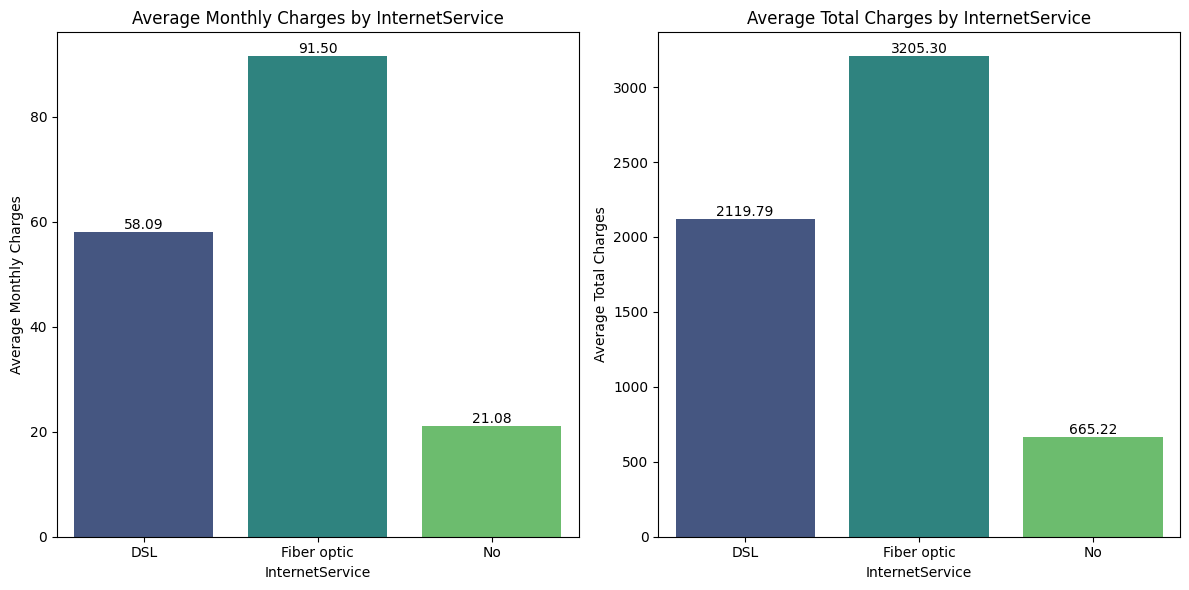

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))

# InternetService별 평균 월 금액 시각화
plt.subplot(1, 2, 1)
sns.barplot(x='InternetService', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', ci=None)
plt.title('Average Monthly Charges by InternetService')
plt.xlabel('InternetService')
plt.ylabel('Average Monthly Charges')

# 금액 표시
for index, value in enumerate(df.groupby('InternetService')['MonthlyCharges'].mean()):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# InternetService별 총 금액 시각화
plt.subplot(1, 2, 2)
sns.barplot(x='InternetService', y='TotalCharges', data=df, palette='viridis', estimator='mean', ci=None)
plt.title('Average Total Charges by InternetService')
plt.xlabel('InternetService')
plt.ylabel('Average Total Charges')

# 금액 표시
for index, value in enumerate(df.groupby('InternetService')['TotalCharges'].mean()):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [ ]:
# 전화서비스만 사용하는 사람 필터링
phone_only_customers = df[(df['PhoneService'] == 'Yes') & (df['InternetService'] == 'No')]

# 인터넷 서비스만 사용하는 사람 필터링
internet_only_customers = df[(df['PhoneService'] == 'No') & (df['InternetService'] != 'No')]

# 두 서비스 사용하는 사람 필터링
both_customers = df[(df['PhoneService'] == 'Yes') & (df['InternetService'] != 'No')]

# 전화서비스만 사용하는 사람 수
phone_only_customers_count = len(phone_only_customers)

# 인터넷 서비스만 사용하는 사람 수
internet_only_customers_count = len(internet_only_customers)

# 두 서비스 사용하는 사람 수
both_customers_count = len(both_customers)

print(f"전화서비스만 사용하는 사람 수: {phone_only_customers_count}명")
print(f"인터넷 서비스만 사용하는 사람 수: {internet_only_customers_count}명")
print(f"두 서비스 사용하는 사람 수: {both_customers_count}명")

전화서비스만 사용하는 사람 수: 1520명
인터넷 서비스만 사용하는 사람 수: 680명
두 서비스 사용하는 사람 수: 4832명


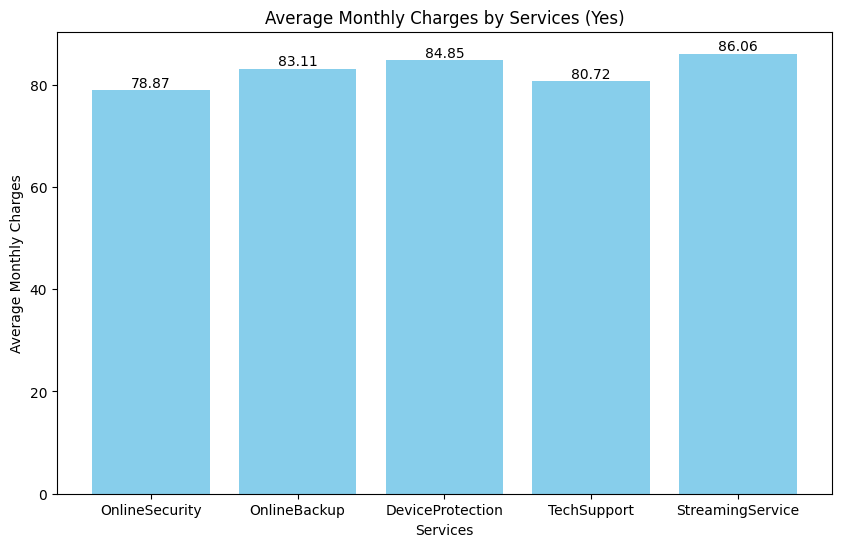

In [ ]:
# 'OnlineSecurity'이 'Yes'인 고객의 월 평균 비용 계산
average_monthly_charges1 = df[df['OnlineSecurity'] == 'Yes']['MonthlyCharges'].mean()
# 'OnlineBackup'이 'Yes'인 고객의 월 평균 비용 계산
average_monthly_charges2 = df[df['OnlineBackup'] == 'Yes']['MonthlyCharges'].mean()
# 'DeviceProtection'이 'Yes'인 고객의 월 평균 비용 계산
average_monthly_charges3 = df[df['DeviceProtection'] == 'Yes']['MonthlyCharges'].mean()
# 'TechSupport'이 'Yes'인 고객의 월 평균 비용 계산
average_monthly_charges4 = df[df['TechSupport'] == 'Yes']['MonthlyCharges'].mean()
# 'StreamingService'이 'Yes'인 고객의 월 평균 비용 계산
average_monthly_charges5 = df[df['StreamingService'] == 'Yes']['MonthlyCharges'].mean()

# 시각화
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingService']
average_monthly_charges = [average_monthly_charges1, average_monthly_charges2, average_monthly_charges3, average_monthly_charges4, average_monthly_charges5]

plt.figure(figsize=(10, 6))
bars = plt.bar(services, average_monthly_charges, color='skyblue')
plt.title('Average Monthly Charges by Services (Yes)')
plt.xlabel('Services')
plt.ylabel('Average Monthly Charges')

# 각 막대에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

<ipython-input-30-149da78c272a>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Contract', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-30-149da78c272a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-30-149da78c272a>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Contract', y='TotalCharges', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-30-149da78c272a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


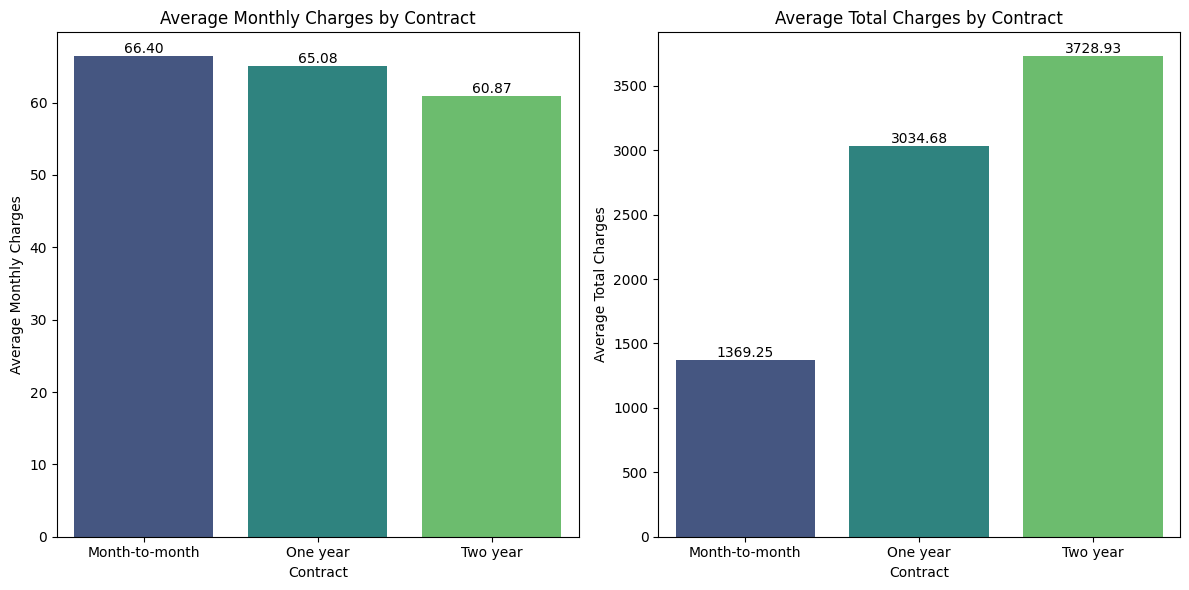

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))

# Contract별 평균 월 금액 시각화
plt.subplot(1, 2, 1)
sns.barplot(x='Contract', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', ci=None)
plt.title('Average Monthly Charges by Contract')
plt.xlabel('Contract')
plt.ylabel('Average Monthly Charges')

# 금액 표시
for index, value in enumerate(df.groupby('Contract')['MonthlyCharges'].mean()):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Contract별 총 금액 시각화
plt.subplot(1, 2, 2)
sns.barplot(x='Contract', y='TotalCharges', data=df, palette='viridis', estimator='mean', ci=None)
plt.title('Average Total Charges by Contract')
plt.xlabel('Contract')
plt.ylabel('Average Total Charges')

# 금액 표시
for index, value in enumerate(df.groupby('Contract')['TotalCharges'].mean()):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

<ipython-input-33-7a9f4f2b36fb>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PaymentMethod', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-33-7a9f4f2b36fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PaymentMethod', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-33-7a9f4f2b36fb>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PaymentMethod', y='TotalCharges', data=df, palette='viridis', estimator='mean', ci=None)
<ipython-input-33-7a9f4f2b36fb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

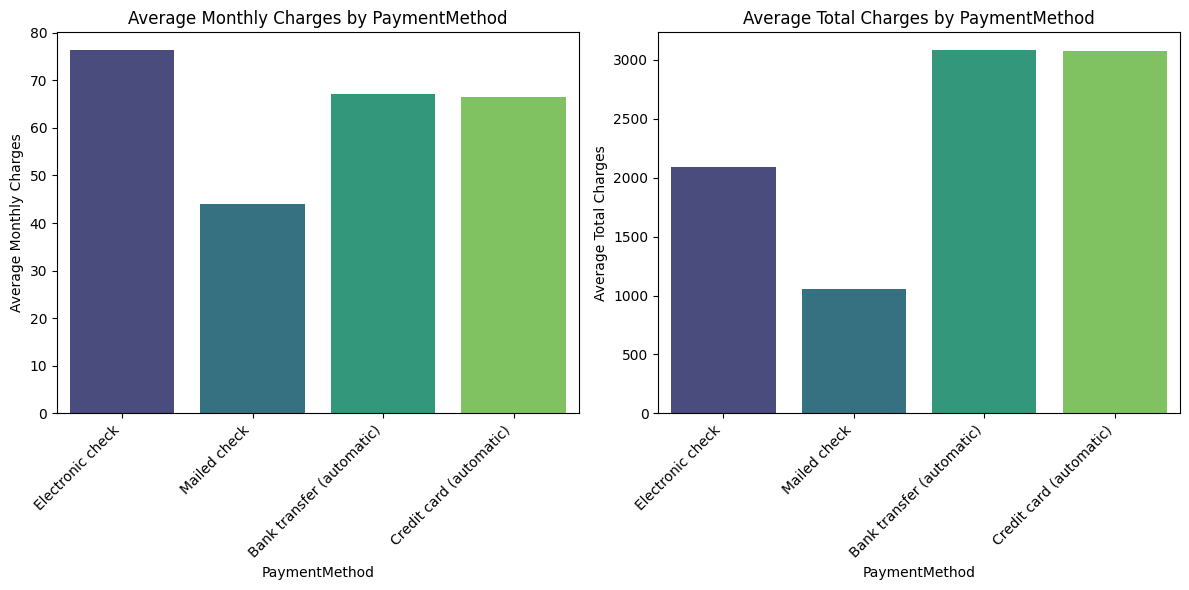

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))

# PaymentMethod별 평균 월 금액 시각화
plt.subplot(1, 2, 1)
sns.barplot(x='PaymentMethod', y='MonthlyCharges', data=df, palette='viridis', estimator='mean', ci=None)
plt.title('Average Monthly Charges by PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Average Monthly Charges')
# xticks 조정
plt.xticks(rotation=45, ha='right')

# PaymentMethod별 총 금액 시각화
plt.subplot(1, 2, 2)
sns.barplot(x='PaymentMethod', y='TotalCharges', data=df, palette='viridis', estimator='mean', ci=None)
plt.title('Average Total Charges by PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Average Total Charges')
# xticks 조정
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

# 통계검정

In [ ]:
from scipy.stats import chi2_contingency

# 이탈 여부와 시니어 여부에 대한 분할표 생성
cross_tab = pd.crosstab(df['Churn'], df['SeniorCitizen'], margins=True)

# 카이제곱 검정 수행
chi2_stat, p_value, _, _ = chi2_contingency(cross_tab)

# 결과 출력
print(f"카이제곱 검정 통계량: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# p-value가 유의수준보다 작으면 귀무가설을 기각하고, 대립가설을 채택합니다.
alpha = 0.05
if p_value < alpha:
    print("이탈과 시니어는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("이탈과 시니어는 통계적으로 유의미한 차이가 없습니다.")

카이제곱 검정 통계량: 159.3635
P-value: 0.0000
이탈과 시니어는 통계적으로 유의미한 차이가 있습니다.


In [ ]:
from scipy.stats import chi2_contingency

# 이탈 여부와 전화 서비스 여부에 대한 분할표 생성
cross_tab = pd.crosstab(df['Churn'], df['PhoneService'], margins=True)

# 카이제곱 검정 수행
chi2_stat, p_value, _, _ = chi2_contingency(cross_tab)

# 결과 출력
print(f"카이제곱 검정 통계량: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# p-value가 유의수준보다 작으면 귀무가설을 기각하고, 대립가설을 채택합니다.
alpha = 0.05
if p_value < alpha:
    print("이탈과 전화서비스는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("이탈과 전화서비스는 통계적으로 유의미한 차이가 없습니다.")

카이제곱 검정 통계량: 0.9612
P-value: 0.9156
이탈과 전화서비스는 통계적으로 유의미한 차이가 없습니다.


In [ ]:
from scipy.stats import chi2_contingency

# 인터넷 서비스와 이탈 여부에 대한 분할표 생성
cross_tab = pd.crosstab(df['InternetService'], df['Churn'], margins=True)

# 카이제곱 검정 수행
chi2_stat, p_value, _, _ = chi2_contingency(cross_tab)

# 결과 출력
print(f"카이제곱 검정 통계량: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# p-value가 유의수준보다 작으면 귀무가설을 기각하고, 대립가설을 채택합니다.
alpha = 0.05
if p_value < alpha:
    print("인터넷 서비스와 이탈 여부는 통계적으로 유의미한 관계가 있습니다.")
else:
    print("인터넷 서비스와 이탈 여부는 통계적으로 유의미한 관계가 없습니다.")

카이제곱 검정 통계량: 728.6956
P-value: 0.0000
인터넷 서비스와 이탈 여부는 통계적으로 유의미한 관계가 있습니다.


In [ ]:
from scipy.stats import chi2_contingency

# 이탈 여부와 인터넷서비스 여부에 대한 분할표 생성
cross_tab = pd.crosstab(df['StreamingTV'], df['StreamingMovies'], margins=True)

# 카이제곱 검정 수행
chi2_stat, p_value, _, _ = chi2_contingency(cross_tab)

# 결과 출력
print(f"카이제곱 검정 통계량: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# p-value가 유의수준보다 작으면 귀무가설을 기각하고, 대립가설을 채택합니다.
alpha = 0.05
if p_value < alpha:
    print("이탈과 인터넷서비스는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("이탈과 인터넷서비스는 통계적으로 유의미한 차이가 없습니다.")

카이제곱 검정 통계량: 8364.6965
P-value: 0.0000
이탈과 인터넷서비스는 통계적으로 유의미한 차이가 있습니다.
